### 07 - Average bbox in training set

In this notebook we will define the average bbox in the training set using the REFER api.

In 08 notebook we will use it to compute the validation metrics.

!pip install -e ../code/rec/refer/

The above command will install the external.py lib, necessary to import directly the REFER api.

In [1]:
import os
import torch
import random

from rec.refer.refer import REFER
from PIL import Image
from torchvision.ops import box_convert

from rec.utils import draw_bounding_boxes


/home/nhormann/miniconda3/envs/rec-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
refer = REFER('../code/rec/refer/data', 'refclef', 'berkeley', )

loading dataset refclef into memory...
creating index...
index created.
DONE (t=4.77s)


In [3]:
ref_ids = refer.getRefIds(split="train")

In [4]:
type(ref_ids)

list

In [5]:
len(ref_ids)

44681

In [6]:
ref_ids[0]

2

In [7]:
rand_int = random.choice(ref_ids)
ref = refer.Refs[rand_int]
ann = refer.refToAnn[rand_int]

In [8]:
ann, ref

({'segmentation': [{'counts': '_:c0f8FlH?l63fH1U7=ZHKd7m1O2N1O2O00000O1001O01O000001O00001O001O00001O001O001O001O001O001O001O001O001O001O00001O001O001O001O001O001N101O001O001O00001O001O001O001O00001O001O001O00001O00001O00001O0O101O00001O000000001O0000001O000000001O000000000000000000001O00000000000000000000000001O0000000000000000000000000001O00000000001O00001O001O1O1O2N3M3M2N2N1O10O01O001O000000001O000000000000000000O10000ZOfN^GZ1b8fN^GZ1b8gN\\GZ1d8fN\\GZ1d8fN\\GZ1d8gNZGZ1f8fNZGZ1f8gNXGZ1h8fNXGZ1h8fNWG[1i8fNVGZ1j8fNUG[1k8fNSG8fNQG[1o8gNmF[1S9=00000000000000O100000000000000000000000000000000000000000000000000000000000000001O00000000000000000000000000000000000000001O0000000000000000000000000000001O00000000000000000000000000000000000000000000000000000000000000000000000000000000001O0O100000000000001O000000001O00001O00001O0O101O00001O001O00001O00001O00001O0000001O000000001O000000001O0000000000001O0O100000000000001O000000000001O00000000000001O00000000000000000000000000000000000000001O00000000

In [9]:
bbox = ann['bbox']
bbox = torch.atleast_2d(torch.FloatTensor(bbox))
bbox = box_convert(bbox, 'xywh', 'xyxy')  # xyxy

In [10]:
bbox

tensor([[  0., 256., 480., 360.]])

In [11]:
file_name = refer.Imgs[ref['image_id']]['file_name']

In [12]:
file_name = os.path.join('../code/rec/refer', 'data', 'images', 'saiapr_tc-12', file_name)

In [13]:
im = Image.open(file_name)

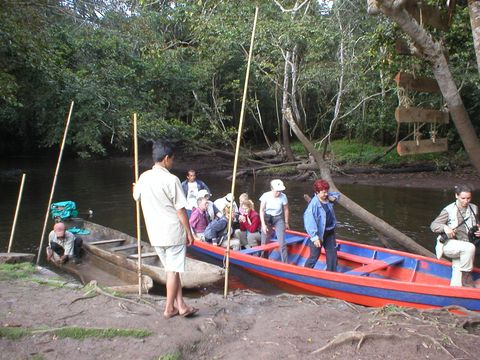

In [14]:

im.show()

In [15]:
im = draw_bounding_boxes(im, [bbox.numpy()], fmt="xyxy", color="lightgreen", line_width=3)

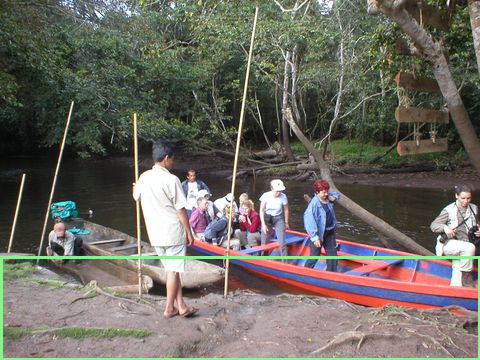

In [16]:
im.show()

OK let's define the average bbox to use it in the next notebook.

In [17]:
bboxes_ann = [refer.refToAnn[i] for i in ref_ids]
bboxes_ann = [box_convert(torch.atleast_2d(torch.FloatTensor(ann["bbox"])), 'xywh', 'xyxy')
              for ann in bboxes_ann]

In [32]:
bbox_mean = torch.mean(torch.stack(bboxes_ann), dim=0)

In [33]:
bbox_mean

tensor([[101.2846, 123.4821, 342.1320, 280.2839]])

The bbox mean is:
```
- x1 = 101.2846
- y1 = 123.4821
- x2 = 342.1320
- y2 = 280.2839
```

In [36]:
im = Image.open(file_name)
im = draw_bounding_boxes(im, [bbox_mean.numpy()], fmt="xyxy", color="lightgreen", line_width=3)

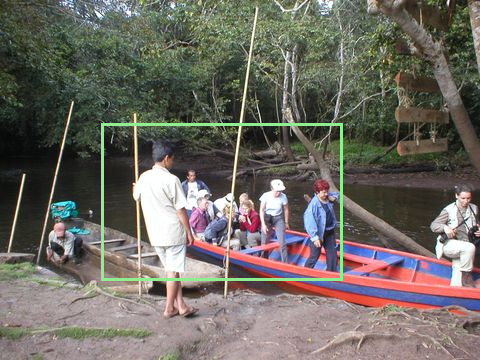

In [37]:
im.show()

The bbox is drawn in almost the center of the image. We will use this bbox to compute the metrics in the validation set.